# Pilot - Sokoban Environment
## v1

In [13]:
import gym
import gym_sokoban
import time
import PIL
import numpy as np
from IPython import display


## 0 - Random Sampling

In [2]:
import time

env = gym.make('Sokoban-v0')
ACTION_LOOKUP = env.unwrapped.get_action_lookup()


for i_episode in range(1):#20
    observation = env.reset()

    for t in range(100):#100
        env.render(mode='human')
        action = env.action_space.sample()

        # Sleep makes the actions visible for users
        time.sleep(1)
        observation, reward, done, info = env.step(action)

        print(ACTION_LOOKUP[action], reward, done, info)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            env.render()
            break

    env.close()
time.sleep(10)

push right -0.1 False {'action.name': 'push right', 'action.moved_player': True, 'action.moved_box': True}
push left -0.1 False {'action.name': 'push left', 'action.moved_player': True, 'action.moved_box': False}
push left -0.1 False {'action.name': 'push left', 'action.moved_player': False, 'action.moved_box': False}
move down -0.1 False {'action.name': 'move down', 'action.moved_player': False, 'action.moved_box': False}
move down -0.1 False {'action.name': 'move down', 'action.moved_player': False, 'action.moved_box': False}
push up -0.1 False {'action.name': 'push up', 'action.moved_player': False, 'action.moved_box': False}


KeyboardInterrupt: 

## 1 - Pilot

In [3]:
env = gym.make('Sokoban-v0')

env.render('human')

action = env.action_space.sample()
observation, reward, done, info = env.step(action)
time.sleep(5)
env.close()

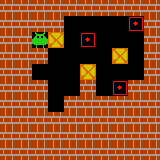

In [8]:
def render_img(env):
    img = env.render(mode='rgb_array')
    display_img = PIL.Image.fromarray(img)
    display.clear_output(wait=True)
    display.display(display_img)
    return img
render_img(env) ;
x = env.room_state

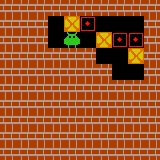

-0.1
step


In [9]:

env = gym.make('Sokoban-v0')
frames = []  # only useful for the GIF
for _ in range(10):
    img = render_img(env)
    frames.append(img)

    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(reward)
    print("step")
    time.sleep(1)

In [14]:
import torch
def encode(x):
    y = np.zeros((4, 10, 10))
    y[0] = x == 0  # wall
    y[1] = x == 5  # agent
    y[2] = (x == 3) | (x == 4)  #box
    y[3] = x == 2  #target
    return y

x = encode(env.room_state)

In [15]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

class DQN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10*10*4, 128)
    
    def forward(self, x):
        h = self.fc1(x.view(x.size(0), -1))
        return F.softmax(h)

y = torch.tensor(x.reshape((1, 4, 10, 10)), dtype=torch.float)

In [16]:
n = DQN()
n(y)

/home/peterparker/anaconda3/envs/sokoban/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


tensor([[0.0060, 0.0047, 0.0102, 0.0080, 0.0076, 0.0061, 0.0055, 0.0063, 0.0071,
         0.0068, 0.0066, 0.0117, 0.0073, 0.0087, 0.0063, 0.0078, 0.0084, 0.0055,
         0.0059, 0.0089, 0.0072, 0.0087, 0.0095, 0.0065, 0.0108, 0.0055, 0.0134,
         0.0038, 0.0068, 0.0119, 0.0068, 0.0056, 0.0093, 0.0088, 0.0057, 0.0089,
         0.0080, 0.0092, 0.0049, 0.0107, 0.0101, 0.0069, 0.0106, 0.0034, 0.0095,
         0.0074, 0.0079, 0.0073, 0.0067, 0.0067, 0.0050, 0.0072, 0.0086, 0.0057,
         0.0071, 0.0059, 0.0087, 0.0100, 0.0094, 0.0066, 0.0078, 0.0075, 0.0058,
         0.0096, 0.0106, 0.0107, 0.0079, 0.0096, 0.0069, 0.0071, 0.0065, 0.0066,
         0.0074, 0.0052, 0.0075, 0.0059, 0.0060, 0.0120, 0.0058, 0.0056, 0.0056,
         0.0111, 0.0061, 0.0082, 0.0150, 0.0090, 0.0097, 0.0089, 0.0090, 0.0082,
         0.0081, 0.0071, 0.0072, 0.0080, 0.0077, 0.0058, 0.0078, 0.0112, 0.0087,
         0.0071, 0.0089, 0.0073, 0.0070, 0.0087, 0.0095, 0.0067, 0.0102, 0.0069,
         0.0098, 0.0071, 0.0

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(3, 3), stride=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=(3, 3), stride=1)
        self.conv4 = nn.Conv2d(64, 32, kernel_size=(1, 1), stride=1)
        self.fc1 = nn.Linear(32*4*4, 128)
    
    def forward(self, x):
        h = F.relu(self.conv1(x))
        h = F.relu(self.conv2(h))
        h = F.relu(self.conv3(h))
        h = F.relu(self.conv4(h))
        h = self.fc1(h.view(h.size(0), -1))
        return F.softmax(h)

In [18]:
y.shape

torch.Size([1, 4, 10, 10])

In [72]:
class ReadoutNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 8)
    
    def forward(self, x):
        h = F.relu(self.fc1(x))
        return F.sigmoid(self.fc2(x))

In [78]:
c = CNN()
r = ReadoutNet()
optimizer1 = optim.Adam(c.parameters())
optimizer2 = optim.Adam(r.parameters())

for i in range(5000):
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    out1 = c(y)
    out2 = r(out1)
    loss = torch.mean(out2)**2
    loss.backward()
    optimizer1.step()
    optimizer2.step()

/home/peterparker/anaconda3/envs/sokoban/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [79]:
out1

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         4.9155e-32, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [80]:
torch.sum(out2)

tensor(0.2787, grad_fn=<SumBackward0>)


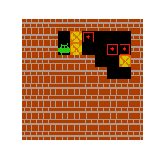
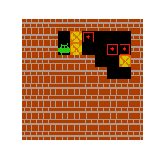
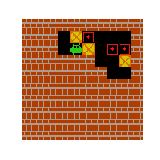
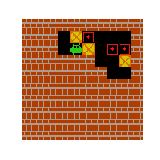
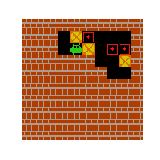
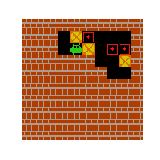
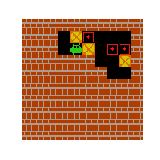
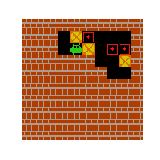
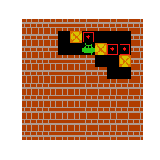
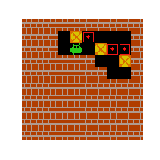

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), 
                                   animate, 
                                   frames=len(frames), 
                                   interval=200)
    display(display_animation(anim, default_mode='once'))

display_frames_as_gif(frames)